In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
!ls

1C Sales Prediction.ipynb sales_train.csv           submission1.csv
item_categories.csv       sample_submission.csv     test.csv
items.csv                 shops.csv


In [339]:
items_df = pd.read_csv('items.csv')
item_cat_df = pd.read_csv('item_categories.csv')
shops_df = pd.read_csv('shops.csv')
sales_train_df = pd.read_csv('sales_train.csv')
test_df = pd.read_csv('test.csv')
sample_df = pd.read_csv('sample_submission.csv',index_col=0)


<h1>Strive exercise 1</h1>

In [41]:
oct15_df = sales_train_df[sales_train_df.date_block_num == 33]

In [61]:
oct15_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2882335,23.10.2015,33,45,13315,649.0,1.0
2882336,05.10.2015,33,45,13880,229.0,1.0
2882337,02.10.2015,33,45,13881,659.0,1.0
2882338,12.10.2015,33,45,13881,659.0,1.0
2882339,04.10.2015,33,45,13923,169.0,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0


In [62]:
grouped_oct = oct15_df.groupby(['shop_id','item_id'],as_index=False).sum().drop('item_price',1)

In [68]:
grouped_oct

,shop_id,item_id,date_block_num,item_cnt_day
0,2,31,33,1.0
1,2,486,99,3.0
2,2,787,33,1.0
3,2,794,33,1.0
4,2,968,33,1.0
...,...,...,...,...
31526,59,22087,99,6.0
31527,59,22088,66,2.0
31528,59,22091,33,1.0
31529,59,22100,33,1.0


In [117]:
new_test_df = pd.merge(left = test_df,  right = grouped_oct, how='left',on=['shop_id','item_id']).fillna(value=0,)

In [123]:
new_test_df.item_cnt_day = new_test_df.item_cnt_day.clip(lower=0,upper=20)

In [125]:
new_test_df

,ID,shop_id,item_id,date_block_num,item_cnt_day
0,0,5,5037,0.0,0.0
1,1,5,5320,0.0,0.0
2,2,5,5233,33.0,1.0
3,3,5,5232,0.0,0.0
4,4,5,5268,0.0,0.0
...,...,...,...,...,...
214195,214195,45,18454,33.0,1.0
214196,214196,45,16188,0.0,0.0
214197,214197,45,15757,0.0,0.0
214198,214198,45,19648,0.0,0.0


In [156]:
sample_df.item_cnt_month = new_test_df.item_cnt_day.values

In [157]:
sample_df

,item_cnt_month
ID,
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
214195,1.0
214196,0.0
214197,0.0


In [159]:
sample_df.to_csv('submission1.csv')

<h1>Strive exercise 2</h1>

In [348]:
#Splitting categories

cat_data = pd.DataFrame([[c.strip() for c in cat.split('-',1)] for cat in item_cat_df.item_category_name],columns=['cat_main','cat_sec'])

item_cat_df[['cat_main','cat_sec']] = cat_data[['cat_main','cat_sec']]


In [327]:
#item_cat_df.iloc[:,[0,1,2,3]] = item_cat_df.iloc[:,[0,2,3,1]]

In [363]:
item_cat_df

,item_category_name,item_category_id,cat_main,cat_sec
0,PC - Гарнитуры/Наушники,0,PC,Гарнитуры/Наушники
1,Аксессуары - PS2,1,Аксессуары,PS2
2,Аксессуары - PS3,2,Аксессуары,PS3
3,Аксессуары - PS4,3,Аксессуары,PS4
4,Аксессуары - PSP,4,Аксессуары,PSP
...,...,...,...,...
79,Служебные,79,Служебные,None
80,Служебные - Билеты,80,Служебные,Билеты
81,Чистые носители (шпиль),81,Чистые носители (шпиль),None
82,Чистые носители (штучные),82,Чистые носители (штучные),None


In [368]:
#Splitting shops
shops_df.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [340]:
shops_df['city'] = [shop.split(' ',1)[0].replace('!','') for shop in shops_df.shop_name]

In [331]:
#shops_df.iloc[:,[0,1,2]] = shops_df.iloc[:,[0,2,1]]

<h4>Merging everything</h4>

In [332]:
mega_df = items_df.merge(item_cat_df[['item_category_id','cat_main','cat_sec']],how='left',on='item_category_id')

In [333]:
mega_df = sales_train_df.merge(mega_df,how='left',on='item_id')

In [342]:
mega_df = mega_df.merge(shops_df,how='left',on='shop_id')

In [343]:
mega_df[1120:1130]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,cat_main,cat_sec,shop_name,city
1120,15.01.2013,0,25,4922,999.0,1.0,Movavi Screen Capture,75,Программы,Для дома и офиса,"Москва ТРК ""Атриум""",Москва
1121,16.01.2013,0,25,4688,1499.0,1.0,MOVAVI Video Suite 11 (box),75,Программы,Для дома и офиса,"Москва ТРК ""Атриум""",Москва
1122,26.01.2013,0,25,4688,1499.0,1.0,MOVAVI Video Suite 11 (box),75,Программы,Для дома и офиса,"Москва ТРК ""Атриум""",Москва
1123,29.01.2013,0,25,4688,1499.0,1.0,MOVAVI Video Suite 11 (box),75,Программы,Для дома и офиса,"Москва ТРК ""Атриум""",Москва
1124,15.01.2013,0,25,4691,699.0,1.0,MOVAVI Видео Конвертер 12 (box),75,Программы,Для дома и офиса,"Москва ТРК ""Атриум""",Москва
1125,26.01.2013,0,25,4960,899.0,1.0,Move Фитнес (Essentials) (только для PS Move) ...,19,Игры,PS3,"Москва ТРК ""Атриум""",Москва
1126,27.01.2013,0,25,4694,249.0,1.0,MP3 Music World Enigmatic Dream (подар.уп.) (...,57,Музыка,MP3,"Москва ТРК ""Атриум""",Москва
1127,19.01.2013,0,25,4697,249.0,1.0,MP3 Music World Fitness Club (mp3-CD) (jewel),57,Музыка,MP3,"Москва ТРК ""Атриум""",Москва
1128,28.01.2013,0,25,4697,249.0,1.0,MP3 Music World Fitness Club (mp3-CD) (jewel),57,Музыка,MP3,"Москва ТРК ""Атриум""",Москва
1129,25.01.2013,0,25,4698,249.0,1.0,MP3 Music World House Party (подар. уп.) (mp3...,57,Музыка,MP3,"Москва ТРК ""Атриум""",Москва


In [344]:
rev_by_city = mega_df.groupby(by='city',as_index=False)['item_price'].sum()

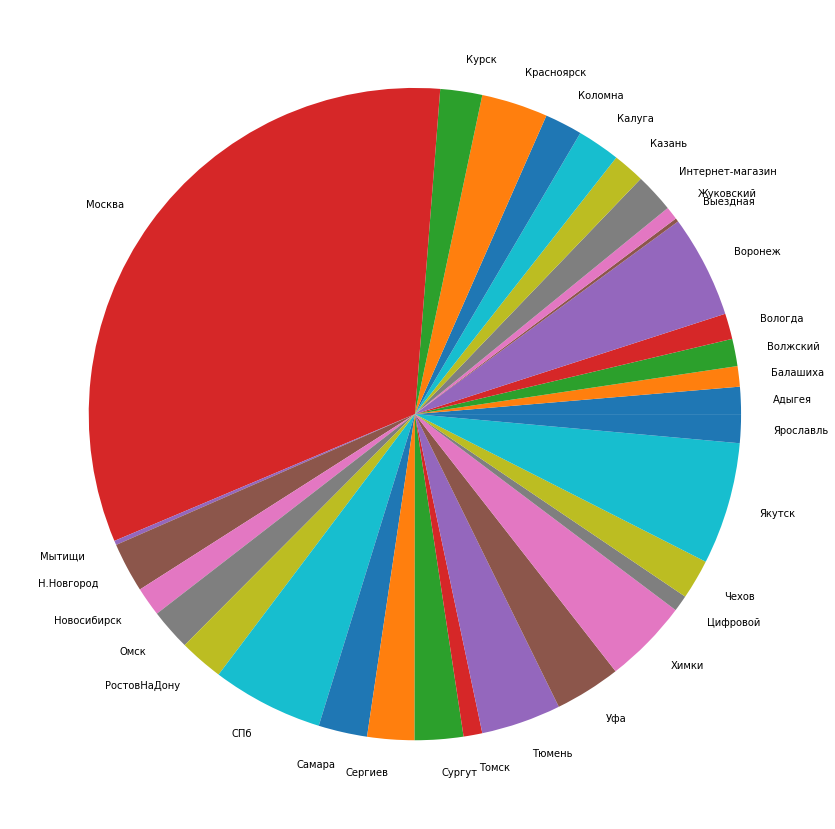

In [345]:
fig = plt.figure(figsize = (15,15))
plt.pie(rev_by_city.item_price,labels=rev_by_city.city)
plt.show()

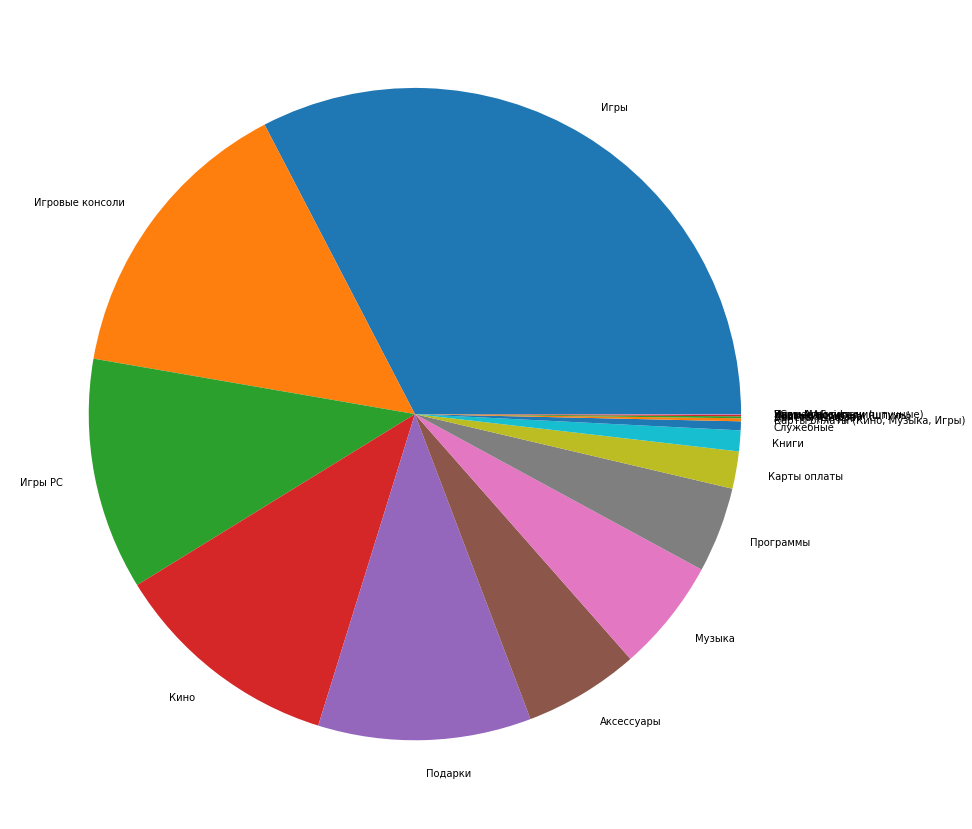

In [292]:
rev_by_cat = mega_df.groupby(by='cat_main',as_index=False)['item_price'].sum()
rev_by_cat_sorted = rev_by_cat.sort_values('item_price',ascending=False)
fig = plt.figure(figsize = (15,15))
plt.pie(rev_by_cat_sorted.item_price,labels=rev_by_cat_sorted.cat_main)
plt.show()

In [349]:
repeating_sec_cats = item_cat_df.cat_sec.value_counts()[1:8].index.tolist()


In [360]:
cats_time = pd.pivot_table(mega_df,values=['item_price'],index=['date_block_num'],columns='cat_main',aggfunc=np.sum).droplevel(0,axis=1)


In [351]:
top10cats = rev_by_cat_sorted[0:10].cat_main.values

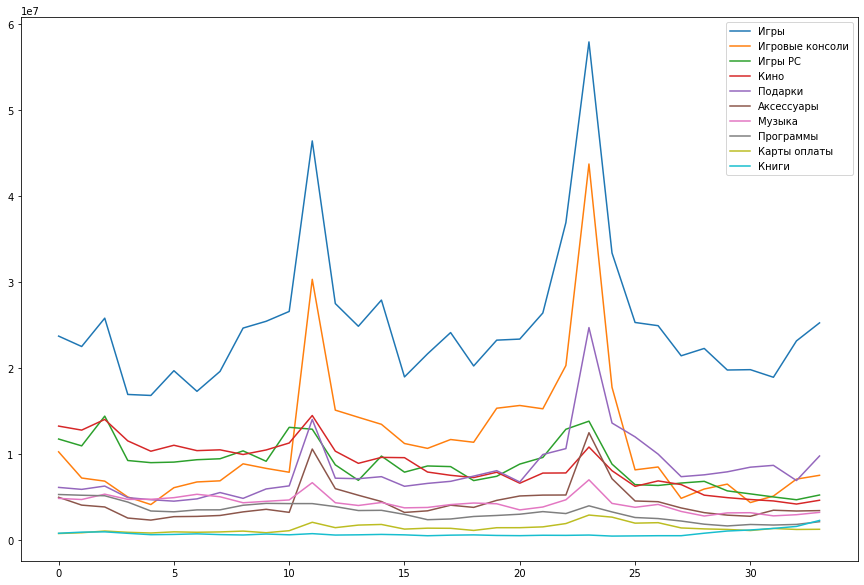

In [361]:
fig = plt.figure(figsize = (15,10))
plt.plot(cats_time[top10cats])
plt.legend(top10cats)
plt.show()

In [359]:
cities_time = pd.pivot_table(mega_df,values=['item_price'],index=['date_block_num'],columns='city',aggfunc=np.sum).droplevel(0,axis=1)

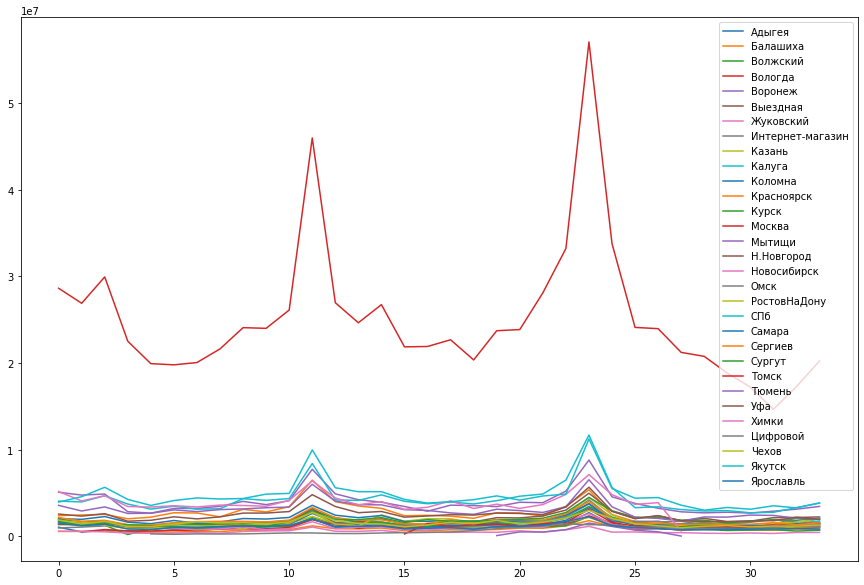

In [362]:
fig = plt.figure(figsize = (15,10))
plt.plot(cities_time)
plt.legend(cities_time.columns)
plt.show()

In [365]:
items_time = pd.pivot_table(mega_df,values=['item_cnt_day'],index=['item_name'],columns='date_block_num',aggfunc=np.sum).droplevel(0,axis=1)
